### Data Preprocess

1) Screen spectra that contain errors induced by the technician or environment
    a) low intensity screen
    b) atmospheric screen
    c) abnormal backgrounds
2) Normalize data
3) Apply the Savitzky-Golay filter
4) Crop data to regions of interest
5) Label and Train/Test split

In [27]:
import pandas as pd
import os

In [28]:
file_path = '../../data/'

datasetfile = f'{file_path}/ds20210428.hdf'
os.path.isfile(datasetfile)
# Load data from HDF file
store = pd.HDFStore(datasetfile)
df = store.get('df')
mdf = store.get('mdf')
store.close()

In [29]:
df

,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,...,3990.0,3991.0,3992.0,3993.0,3994.0,3995.0,3996.0,3997.0,3998.0,3999.0
r20210427_017,0.740127,0.740160,0.740761,0.740664,0.739450,0.738242,0.736825,0.735270,0.733217,0.731701,...,0.321813,0.321788,0.321641,0.321628,0.321719,0.321887,0.321893,0.321823,0.321732,0.321740
r20210419_040,0.881375,0.880307,0.879972,0.879413,0.877486,0.876812,0.877073,0.876913,0.875846,0.874860,...,0.614880,0.615196,0.615211,0.615201,0.615253,0.615342,0.615321,0.615289,0.615323,0.615261
r20210419_011,0.774389,0.774956,0.776301,0.777216,0.776414,0.775258,0.774239,0.772402,0.771260,0.770710,...,0.483338,0.483423,0.483686,0.483962,0.484230,0.484308,0.484411,0.484619,0.485105,0.485316
r20210408_023,0.752687,0.752570,0.752688,0.752264,0.750698,0.750216,0.750309,0.750157,0.749990,0.750100,...,0.420238,0.419869,0.419781,0.419868,0.420042,0.420014,0.419912,0.419865,0.420018,0.420222
r20210412_007,0.470638,0.470298,0.470473,0.470340,0.469782,0.469759,0.470900,0.471061,0.470383,0.469585,...,0.299193,0.299308,0.299159,0.298970,0.298848,0.298866,0.298955,0.299048,0.299195,0.299336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r20210419_005,0.570125,0.568993,0.567810,0.565507,0.564112,0.563270,0.562719,0.562451,0.562289,0.562376,...,0.329933,0.329911,0.329704,0.329589,0.329585,0.329765,0.329909,0.330014,0.330052,0.330000
r20210414_003,0.549276,0.549162,0.549790,0.550623,0.550506,0.550287,0.549794,0.548786,0.547366,0.546038,...,0.302254,0.302331,0.302435,0.302432,0.302399,0.302356,0.302348,0.302359,0.302436,0.302533
r20210414_031,0.490670,0.489640,0.489423,0.488679,0.487223,0.486035,0.485913,0.485713,0.484719,0.483440,...,0.297594,0.297562,0.297646,0.297801,0.297992,0.298230,0.298311,0.298352,0.298361,0.298336
r20210419_007,0.870165,0.869148,0.868680,0.868103,0.866510,0.866011,0.866370,0.866971,0.867017,0.867205,...,0.422597,0.422590,0.422529,0.422482,0.422509,0.422520,0.422451,0.422428,0.422495,0.422673


In [30]:
from src.tools.tools import Preprocess
import numpy as np

#### Spectra Screening

We adapted several screening protocols from Sivia et al. (2022) for removing spectra that have low intensity, atmospheric interferences, or abnormal backgrounds. Most of these procedures involve investigating the tail regions, i.e., <600cm<sup>-1</sup> or >3400cm<sup>-1</sup>, rather than regions between 3400 and 600cm<sup>-1</sup> which contain most of the interesting information generated from MIRS.

In [31]:
filtered_df_a, bad_spectra_a = Preprocess().discard_low_intensity_spectra(df.copy(), mu_thres=0.11)

0 spectra have been discarded because of their low intensity.


In [32]:
filtered_df_a

,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,...,3990.0,3991.0,3992.0,3993.0,3994.0,3995.0,3996.0,3997.0,3998.0,3999.0
r20210427_017,0.740127,0.740160,0.740761,0.740664,0.739450,0.738242,0.736825,0.735270,0.733217,0.731701,...,0.321813,0.321788,0.321641,0.321628,0.321719,0.321887,0.321893,0.321823,0.321732,0.321740
r20210419_040,0.881375,0.880307,0.879972,0.879413,0.877486,0.876812,0.877073,0.876913,0.875846,0.874860,...,0.614880,0.615196,0.615211,0.615201,0.615253,0.615342,0.615321,0.615289,0.615323,0.615261
r20210419_011,0.774389,0.774956,0.776301,0.777216,0.776414,0.775258,0.774239,0.772402,0.771260,0.770710,...,0.483338,0.483423,0.483686,0.483962,0.484230,0.484308,0.484411,0.484619,0.485105,0.485316
r20210408_023,0.752687,0.752570,0.752688,0.752264,0.750698,0.750216,0.750309,0.750157,0.749990,0.750100,...,0.420238,0.419869,0.419781,0.419868,0.420042,0.420014,0.419912,0.419865,0.420018,0.420222
r20210412_007,0.470638,0.470298,0.470473,0.470340,0.469782,0.469759,0.470900,0.471061,0.470383,0.469585,...,0.299193,0.299308,0.299159,0.298970,0.298848,0.298866,0.298955,0.299048,0.299195,0.299336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r20210419_005,0.570125,0.568993,0.567810,0.565507,0.564112,0.563270,0.562719,0.562451,0.562289,0.562376,...,0.329933,0.329911,0.329704,0.329589,0.329585,0.329765,0.329909,0.330014,0.330052,0.330000
r20210414_003,0.549276,0.549162,0.549790,0.550623,0.550506,0.550287,0.549794,0.548786,0.547366,0.546038,...,0.302254,0.302331,0.302435,0.302432,0.302399,0.302356,0.302348,0.302359,0.302436,0.302533
r20210414_031,0.490670,0.489640,0.489423,0.488679,0.487223,0.486035,0.485913,0.485713,0.484719,0.483440,...,0.297594,0.297562,0.297646,0.297801,0.297992,0.298230,0.298311,0.298352,0.298361,0.298336
r20210419_007,0.870165,0.869148,0.868680,0.868103,0.866510,0.866011,0.866370,0.866971,0.867017,0.867205,...,0.422597,0.422590,0.422529,0.422482,0.422509,0.422520,0.422451,0.422428,0.422495,0.422673


In [33]:
filtered_df_b, bad_spectra_b = Preprocess().discard_spectra_with_bad_fitting(filtered_df_a.copy(), rs_thres=0.99)

0 spectra have been discarded because they have atmospheric interferences.


In [34]:
filtered_df_final, bad_spectra_c = Preprocess().discard_distorted_spectra(filtered_df_b.copy(), l=1.5)

4 spectra have been discarded because they were distorted by the anvil.


In [35]:
filtered_df_final

,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,...,3990.0,3991.0,3992.0,3993.0,3994.0,3995.0,3996.0,3997.0,3998.0,3999.0
r20210427_017,0.740127,0.740160,0.740761,0.740664,0.739450,0.738242,0.736825,0.735270,0.733217,0.731701,...,0.321813,0.321788,0.321641,0.321628,0.321719,0.321887,0.321893,0.321823,0.321732,0.321740
r20210419_040,0.881375,0.880307,0.879972,0.879413,0.877486,0.876812,0.877073,0.876913,0.875846,0.874860,...,0.614880,0.615196,0.615211,0.615201,0.615253,0.615342,0.615321,0.615289,0.615323,0.615261
r20210419_011,0.774389,0.774956,0.776301,0.777216,0.776414,0.775258,0.774239,0.772402,0.771260,0.770710,...,0.483338,0.483423,0.483686,0.483962,0.484230,0.484308,0.484411,0.484619,0.485105,0.485316
r20210408_023,0.752687,0.752570,0.752688,0.752264,0.750698,0.750216,0.750309,0.750157,0.749990,0.750100,...,0.420238,0.419869,0.419781,0.419868,0.420042,0.420014,0.419912,0.419865,0.420018,0.420222
r20210412_007,0.470638,0.470298,0.470473,0.470340,0.469782,0.469759,0.470900,0.471061,0.470383,0.469585,...,0.299193,0.299308,0.299159,0.298970,0.298848,0.298866,0.298955,0.299048,0.299195,0.299336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r20210419_005,0.570125,0.568993,0.567810,0.565507,0.564112,0.563270,0.562719,0.562451,0.562289,0.562376,...,0.329933,0.329911,0.329704,0.329589,0.329585,0.329765,0.329909,0.330014,0.330052,0.330000
r20210414_003,0.549276,0.549162,0.549790,0.550623,0.550506,0.550287,0.549794,0.548786,0.547366,0.546038,...,0.302254,0.302331,0.302435,0.302432,0.302399,0.302356,0.302348,0.302359,0.302436,0.302533
r20210414_031,0.490670,0.489640,0.489423,0.488679,0.487223,0.486035,0.485913,0.485713,0.484719,0.483440,...,0.297594,0.297562,0.297646,0.297801,0.297992,0.298230,0.298311,0.298352,0.298361,0.298336
r20210419_007,0.870165,0.869148,0.868680,0.868103,0.866510,0.866011,0.866370,0.866971,0.867017,0.867205,...,0.422597,0.422590,0.422529,0.422482,0.422509,0.422520,0.422451,0.422428,0.422495,0.422673


#### Drop Filtered Spectra

Check if spectra are

In [36]:
marks_droplist = ['r20210408_004','r20210408_007','r20210408_008','r20210408_010','r20210408_011','r20210408_013','r20210408_014','r20210408_016','r20210408_017','r20210408_018','r20210408_019','r20210408_021','r20210408_022','r20210408_023','r20210412_003','r20210412_005','r20210412_006','r20210412_007','r20210412_008','r20210412_010','r20210412_011','r20210412_012','r20210412_013','r20210412_015','r20210412_016']

droplist = set(bad_spectra_c + bad_spectra_b + bad_spectra_a + [f'MA: {i}' for i in marks_droplist])
droplist2 = [i.split(' ')[1] for i in droplist]
droplist2

['r20210408_008',
 'r20210412_006',
 'r20210408_019',
 'r20210412_007',
 'r20210408_017',
 'r20210416_006',
 'r20210408_007',
 'r20210408_004',
 'r20210412_005',
 'r20210408_022',
 'r20210412_015',
 'r20210412_012',
 'r20210408_013',
 'r20210412_008',
 'r20210408_014',
 'r20210412_016',
 'r20210408_023',
 'r20210408_018',
 'r20210408_010',
 'r20210408_016',
 'r20210414_004',
 'r20210412_011',
 'r20210412_003',
 'r20210408_011',
 'r20210412_013',
 'r20210408_021',
 'r20210408_005',
 'r20210419_012',
 'r20210412_010']

In [37]:
# elements in both lists
set(droplist2)&set(marks_droplist)

{'r20210408_004',
 'r20210408_007',
 'r20210408_008',
 'r20210408_010',
 'r20210408_011',
 'r20210408_013',
 'r20210408_014',
 'r20210408_016',
 'r20210408_017',
 'r20210408_018',
 'r20210408_019',
 'r20210408_021',
 'r20210408_022',
 'r20210408_023',
 'r20210412_003',
 'r20210412_005',
 'r20210412_006',
 'r20210412_007',
 'r20210412_008',
 'r20210412_010',
 'r20210412_011',
 'r20210412_012',
 'r20210412_013',
 'r20210412_015',
 'r20210412_016'}

In [38]:
#keep_list = list(set(filtered_df_final.index.tolist())^set(marks_droplist))
#filtered_df_final = filtered_df_final.copy().loc[keep_list]

#### Savitzky-Golay Filter

In [39]:
windowsize = 5  ## window size
porder = 2  ## polynomial order
dorder = 2  # derivative order

filtered_df_sg = Preprocess().sg_dataframe(filtered_df_final.copy(), windowsize=windowsize, polyorder=porder, deriv=dorder)

In [40]:
filtered_df_sg

,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,...,3990.0,3991.0,3992.0,3993.0,3994.0,3995.0,3996.0,3997.0,3998.0,3999.0
r20210427_017,-0.0,0.000044,-0.000456,-0.000677,-0.000376,-0.000128,-0.000261,-0.000099,0.000637,0.00097,...,-0.000158,-0.000047,0.000053,0.000105,0.000016,-0.000069,-0.000085,-0.000002,0.000037,0.000047
r20210419_040,-0.000497,-0.00036,-0.000277,-0.000292,0.000413,0.000639,-0.000173,-0.000486,-0.000002,0.000656,...,-0.00004,-0.000128,-0.000079,0.00003,0.000002,-0.00004,-0.000017,-0.000002,0.000013,-0.000002
r20210419_011,-0.0,0.000211,-0.000452,-0.00096,-0.000603,-0.000276,-0.000113,0.000233,0.000609,0.000281,...,0.000207,0.000165,0.000054,-0.000054,-0.000077,-0.000014,0.000132,0.000071,-0.000039,-0.0
r20210408_023,0.000033,-0.000121,-0.000492,-0.000334,0.000303,0.000486,0.000055,0.000003,0.00001,-0.000881,...,-0.000092,0.000097,0.00018,0.00003,-0.000083,-0.000074,0.000059,0.000116,0.000079,-0.0
r20210412_007,0.000003,-0.000062,-0.000106,-0.000117,0.000441,0.000372,-0.000327,-0.000674,-0.000038,0.00027,...,-0.000182,-0.000161,-0.000074,0.000057,0.0001,0.000071,0.000037,0.000023,0.000013,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r20210419_005,-0.000999,-0.000989,-0.000235,0.000227,0.00058,0.000364,0.000235,0.000197,0.000037,-0.000211,...,-0.000115,-0.000078,0.000018,0.000126,0.0001,0.000026,-0.000046,-0.000066,-0.000028,-0.000007
r20210414_003,0.000033,0.000311,0.000028,-0.000378,-0.000393,-0.000294,-0.000417,-0.000297,0.000229,0.000431,...,0.00002,-0.000008,-0.000047,-0.000046,-0.000003,0.000017,0.000037,0.00004,0.000027,-0.0
r20210414_031,-0.000418,-0.000391,-0.000197,-0.000379,0.000216,0.000511,0.000044,-0.000444,0.00003,0.000461,...,0.000074,0.000082,0.000074,0.000049,-0.000014,-0.000065,-0.000071,-0.000035,-0.000009,0.000002
r20210419_007,-0.000558,-0.000377,-0.00018,-0.000154,0.000424,0.00075,0.00019,-0.000128,-0.000083,-0.000253,...,-0.000139,-0.00005,0.000012,0.000031,-0.000008,-0.000026,0.000022,0.000083,0.000074,-0.0


#### Normalize Data

In [41]:
filtered_df_sg_norm = Preprocess().hnorm_df(filtered_df_sg.copy(), 2)

In [42]:
filtered_df_sg_norm

,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,...,3990.0,3991.0,3992.0,3993.0,3994.0,3995.0,3996.0,3997.0,3998.0,3999.0
r20210427_017,0.01724,0.01735,0.016094,0.01554,0.016294,0.016919,0.016584,0.01699,0.01884,0.019676,...,0.016843,0.017121,0.017372,0.017503,0.01728,0.017066,0.017027,0.017234,0.017332,0.017358
r20210419_040,0.015597,0.016034,0.016297,0.01625,0.0185,0.019219,0.016632,0.015633,0.017175,0.019273,...,0.017054,0.016773,0.01693,0.017277,0.017189,0.017055,0.017128,0.017175,0.017224,0.017175
r20210419_011,0.017227,0.017699,0.016213,0.015076,0.015875,0.016608,0.016973,0.017749,0.018591,0.017856,...,0.01769,0.017597,0.017348,0.017106,0.017055,0.017195,0.017522,0.017385,0.01714,0.017227
r20210408_023,0.017293,0.016957,0.016151,0.016493,0.017878,0.018277,0.01734,0.017226,0.017243,0.015304,...,0.01702,0.017431,0.017612,0.017285,0.01704,0.01706,0.017349,0.017472,0.017392,0.01722
r20210412_007,0.017244,0.016993,0.016818,0.016777,0.018948,0.018681,0.015959,0.014608,0.017083,0.018284,...,0.016526,0.016604,0.016946,0.017456,0.017621,0.017511,0.017378,0.017321,0.017284,0.017233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r20210419_005,0.014941,0.014965,0.016695,0.017757,0.018568,0.018071,0.017775,0.017689,0.01732,0.016751,...,0.016971,0.017057,0.017278,0.017526,0.017466,0.017296,0.01713,0.017085,0.017171,0.01722
r20210414_003,0.01734,0.018284,0.017325,0.01595,0.015896,0.016233,0.015817,0.016222,0.018005,0.018691,...,0.017295,0.017203,0.017071,0.017073,0.017219,0.017288,0.017355,0.017363,0.017321,0.017229
r20210414_031,0.015694,0.015794,0.016507,0.015837,0.018027,0.019112,0.017394,0.015599,0.017344,0.018928,...,0.017505,0.017532,0.017502,0.017413,0.017179,0.016992,0.016969,0.017103,0.017197,0.017239
r20210419_007,0.016025,0.01642,0.016849,0.016906,0.018166,0.018875,0.017656,0.016962,0.01706,0.01669,...,0.016938,0.017132,0.017267,0.017309,0.017224,0.017186,0.01729,0.017424,0.017402,0.017242


#### Plot Data

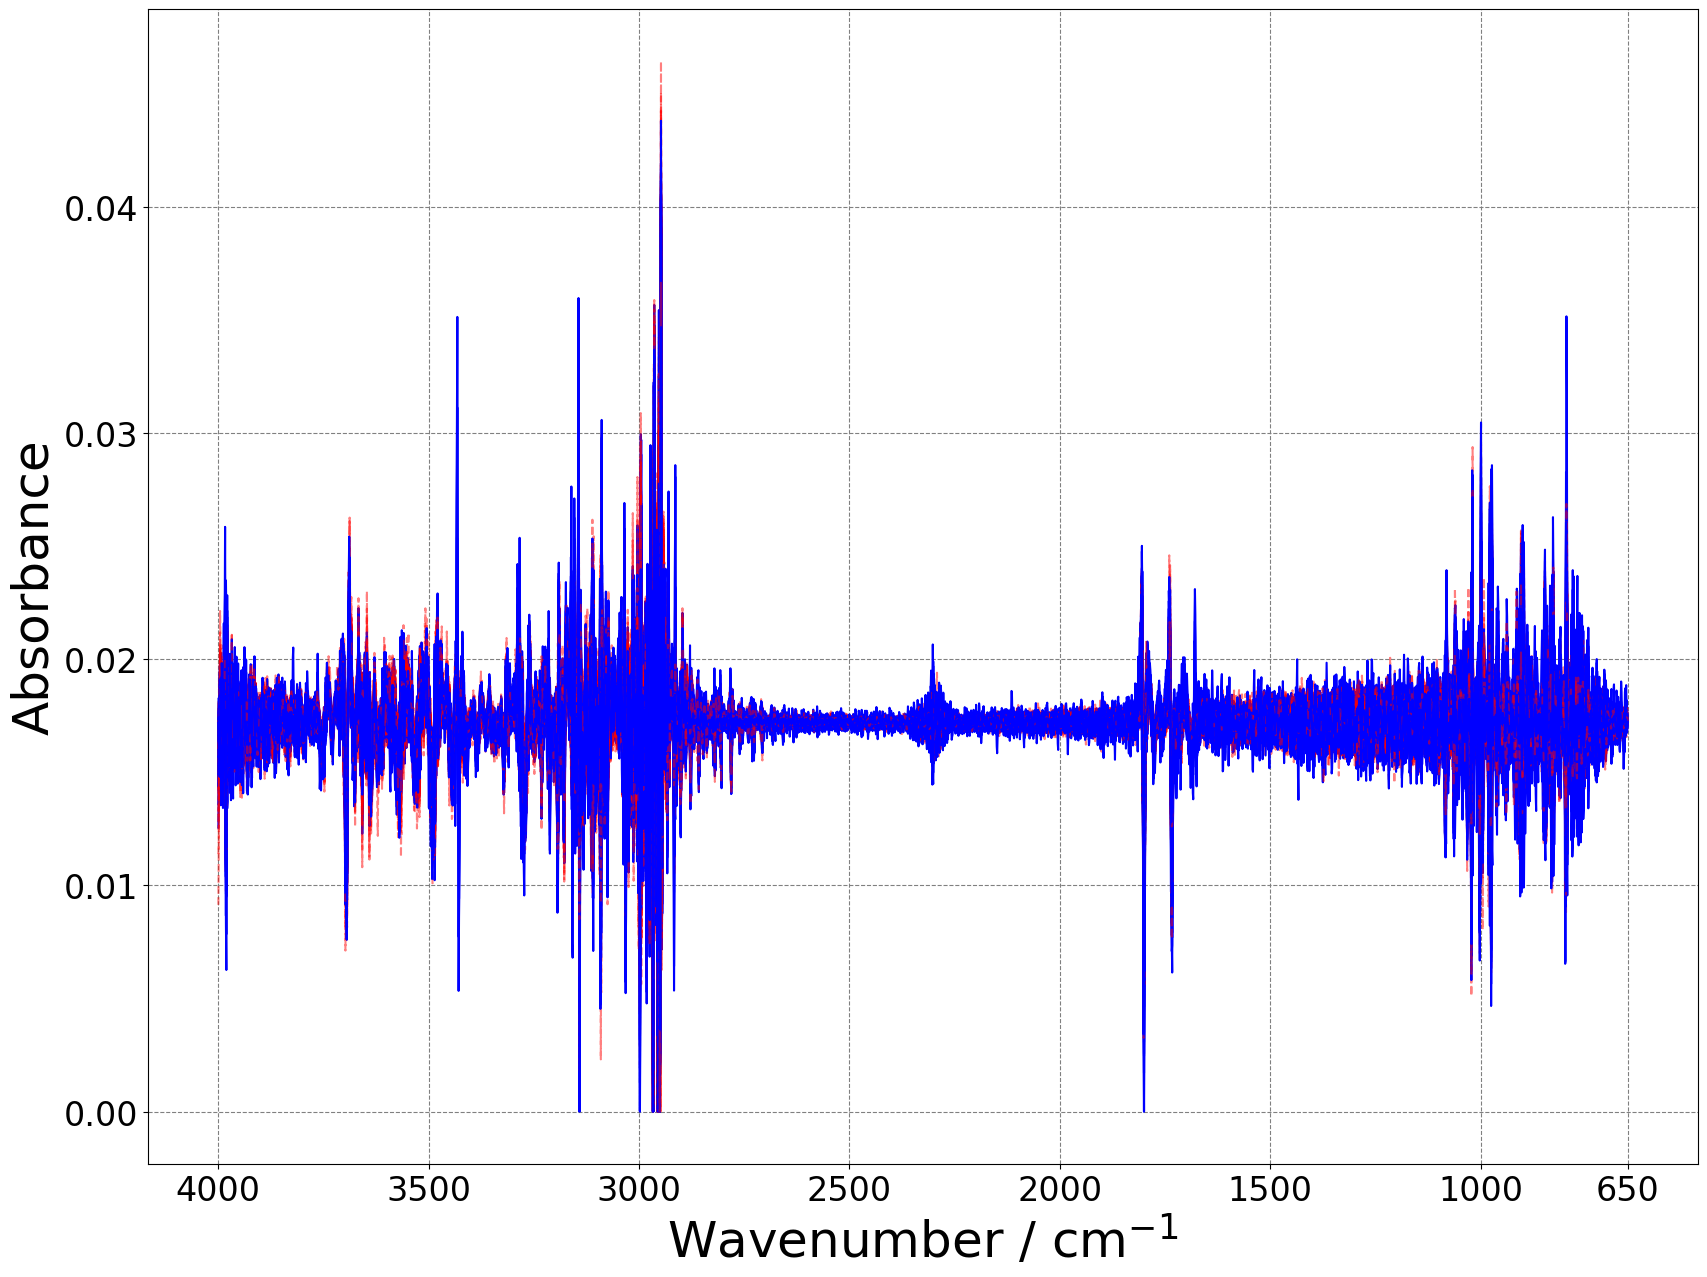

In [50]:
import matplotlib.pyplot as plt

# Create the descending wavenumber array: 4000 down to 650 inclusive
x = np.arange(4000, 650, -1)  # last argument is exclusive, so 649 means it stops at 650

fig, ax = plt.subplots(figsize=(20, 15))


# Iterate over each row (spectrum) in your filtered DataFrame
for index, row in filtered_df_sg_norm.iterrows():
    # Use 'x' for the x-axis and the row values for the y-axis
    if mdf.loc[index, 'notes/comments'] == 'parous':
        ax.plot(x, row.values, color='red', linestyle='--', alpha=0.5)
    else:
        ax.plot(x, row.values, color='blue')

# Labeling and styling
plt.xlabel('Wavenumber / cm$^{-1}$', fontsize=36)
plt.ylabel('Absorbance', fontsize=36)

# Set x-ticks every 500 from 4000 down to 650
# Because 650 won't be hit exactly by stepping -500, you can do something like:
xtick_vals = [4000, 3500, 3000, 2500, 2000, 1500, 1000, 650]
plt.xticks(xtick_vals, fontsize=24)

plt.yticks(fontsize=24)
plt.grid(True, which='both', linestyle='--', color='gray')
plt.gca().set_facecolor('white')

# If you want the highest wavenumber (4000) on the left and lower on the right:
plt.gca().invert_xaxis()
plt.legend(loc='upper left')

plt.savefig('../../figures/sg_transformed_spectra.png', dpi=600)
plt.show()

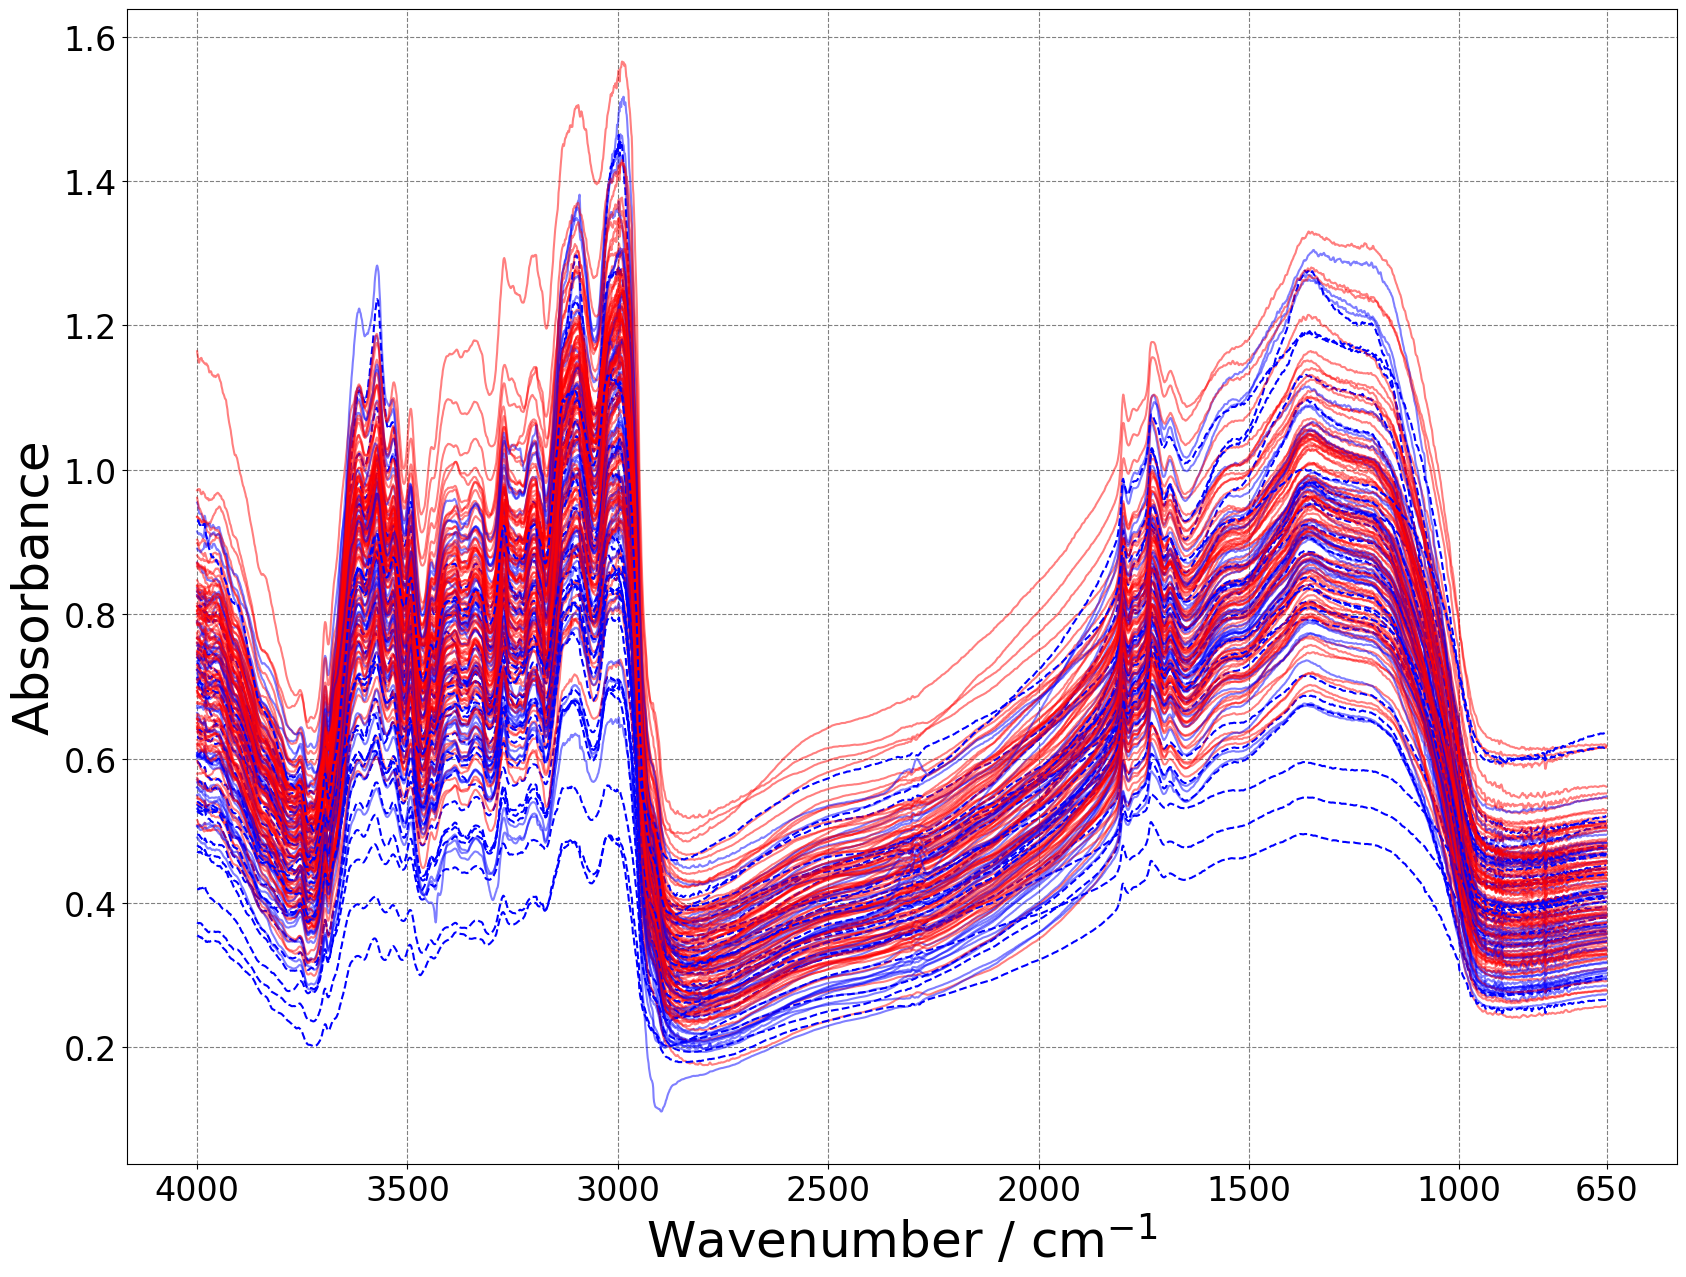

In [49]:
# Define x-axis (wavenumbers) from 4000 down to 650 inclusive
x = np.arange(4000, 650, -1)

fig, ax = plt.subplots(figsize=(20, 15))

# Iterate over each row (spectrum) in filtered_df_sg_norm
for index, row in filtered_df_sg_norm.iterrows():
    # Check metadata in mdf
    if mdf.loc[index, 'notes/comments'] == 'parous':
        if index in marks_droplist:
            ax.plot(x, df.loc[index].values, color='red', linestyle='--')
        elif index in droplist2:
            ax.plot(x, df.loc[index].values, color='green', linewidth=2)
        else:
            ax.plot(x, df.loc[index].values, color='red', alpha=0.5)
    else:
        if index in marks_droplist:
            ax.plot(x, df.loc[index].values, color='blue', linestyle='--')
        elif index in droplist2:
            ax.plot(x, df.loc[index].values, color='green', linewidth=4)
        else:
            ax.plot(x, df.loc[index].values, color='blue', alpha=0.5)

# Labeling
plt.xlabel('Wavenumber / cm$^{-1}$', fontsize=36)
plt.ylabel('Absorbance', fontsize=36)

# If you want x-ticks from 4000 down to 500 every 500:
# But since you only go to 650, let's go 4000 -> 3500 -> ... -> 650
xticks_vals = [4000, 3500, 3000, 2500, 2000, 1500, 1000, 650]
plt.xticks(xticks_vals, fontsize=24)

plt.yticks(fontsize=24)

# Invert x-axis so 4000 is on the left and 650 is on the right
plt.gca().invert_xaxis()

plt.grid(True, which='both', linestyle='--', color='gray')
plt.gca().set_facecolor('white')

# Save the figure
plt.savefig('../../figures/untransformed_spectra.png', dpi=600)
plt.show()


#### Training/Test Split

In [19]:
filtered_df_sg_norm

,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,...,3990.0,3991.0,3992.0,3993.0,3994.0,3995.0,3996.0,3997.0,3998.0,3999.0
r20210427_017,0.01724,0.01735,0.016094,0.01554,0.016294,0.016919,0.016584,0.01699,0.01884,0.019676,...,0.016843,0.017121,0.017372,0.017503,0.01728,0.017066,0.017027,0.017234,0.017332,0.017358
r20210419_040,0.015597,0.016034,0.016297,0.01625,0.0185,0.019219,0.016632,0.015633,0.017175,0.019273,...,0.017054,0.016773,0.01693,0.017277,0.017189,0.017055,0.017128,0.017175,0.017224,0.017175
r20210419_011,0.017227,0.017699,0.016213,0.015076,0.015875,0.016608,0.016973,0.017749,0.018591,0.017856,...,0.01769,0.017597,0.017348,0.017106,0.017055,0.017195,0.017522,0.017385,0.01714,0.017227
r20210408_023,0.017293,0.016957,0.016151,0.016493,0.017878,0.018277,0.01734,0.017226,0.017243,0.015304,...,0.01702,0.017431,0.017612,0.017285,0.01704,0.01706,0.017349,0.017472,0.017392,0.01722
r20210412_007,0.017244,0.016993,0.016818,0.016777,0.018948,0.018681,0.015959,0.014608,0.017083,0.018284,...,0.016526,0.016604,0.016946,0.017456,0.017621,0.017511,0.017378,0.017321,0.017284,0.017233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r20210419_005,0.014941,0.014965,0.016695,0.017757,0.018568,0.018071,0.017775,0.017689,0.01732,0.016751,...,0.016971,0.017057,0.017278,0.017526,0.017466,0.017296,0.01713,0.017085,0.017171,0.01722
r20210414_003,0.01734,0.018284,0.017325,0.01595,0.015896,0.016233,0.015817,0.016222,0.018005,0.018691,...,0.017295,0.017203,0.017071,0.017073,0.017219,0.017288,0.017355,0.017363,0.017321,0.017229
r20210414_031,0.015694,0.015794,0.016507,0.015837,0.018027,0.019112,0.017394,0.015599,0.017344,0.018928,...,0.017505,0.017532,0.017502,0.017413,0.017179,0.016992,0.016969,0.017103,0.017197,0.017239
r20210419_007,0.016025,0.01642,0.016849,0.016906,0.018166,0.018875,0.017656,0.016962,0.01706,0.01669,...,0.016938,0.017132,0.017267,0.017309,0.017224,0.017186,0.01729,0.017424,0.017402,0.017242


In [20]:
from sklearn.preprocessing import LabelBinarizer

## create y column for metadata dataframe
lb = LabelBinarizer()
mdf['y'] = lb.fit_transform(mdf['notes/comments'])

filtered_df_sg_norm = pd.merge(filtered_df_sg_norm, mdf['y'],left_index=True, right_index=True, how='left')

In [21]:
from sklearn.preprocessing import LabelEncoder

mlb = LabelEncoder()
mdf['s'] = mlb.fit_transform(mdf['creator and sampledate (put in tube)'])

filtered_df_sg_norm_merged = pd.merge(filtered_df_sg_norm, mdf['s'],left_index=True, right_index=True, how='left')

In [22]:
filtered_df_sg_norm_merged

,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,...,3992.0,3993.0,3994.0,3995.0,3996.0,3997.0,3998.0,3999.0,y,s
r20210427_017,0.01724,0.01735,0.016094,0.01554,0.016294,0.016919,0.016584,0.01699,0.01884,0.019676,...,0.017372,0.017503,0.01728,0.017066,0.017027,0.017234,0.017332,0.017358,1,7
r20210419_040,0.015597,0.016034,0.016297,0.01625,0.0185,0.019219,0.016632,0.015633,0.017175,0.019273,...,0.01693,0.017277,0.017189,0.017055,0.017128,0.017175,0.017224,0.017175,1,5
r20210419_011,0.017227,0.017699,0.016213,0.015076,0.015875,0.016608,0.016973,0.017749,0.018591,0.017856,...,0.017348,0.017106,0.017055,0.017195,0.017522,0.017385,0.01714,0.017227,1,5
r20210408_023,0.017293,0.016957,0.016151,0.016493,0.017878,0.018277,0.01734,0.017226,0.017243,0.015304,...,0.017612,0.017285,0.01704,0.01706,0.017349,0.017472,0.017392,0.01722,0,0
r20210412_007,0.017244,0.016993,0.016818,0.016777,0.018948,0.018681,0.015959,0.014608,0.017083,0.018284,...,0.016946,0.017456,0.017621,0.017511,0.017378,0.017321,0.017284,0.017233,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r20210419_005,0.014941,0.014965,0.016695,0.017757,0.018568,0.018071,0.017775,0.017689,0.01732,0.016751,...,0.017278,0.017526,0.017466,0.017296,0.01713,0.017085,0.017171,0.01722,1,5
r20210414_003,0.01734,0.018284,0.017325,0.01595,0.015896,0.016233,0.015817,0.016222,0.018005,0.018691,...,0.017071,0.017073,0.017219,0.017288,0.017355,0.017363,0.017321,0.017229,0,2
r20210414_031,0.015694,0.015794,0.016507,0.015837,0.018027,0.019112,0.017394,0.015599,0.017344,0.018928,...,0.017502,0.017413,0.017179,0.016992,0.016969,0.017103,0.017197,0.017239,0,2
r20210419_007,0.016025,0.01642,0.016849,0.016906,0.018166,0.018875,0.017656,0.016962,0.01706,0.01669,...,0.017267,0.017309,0.017224,0.017186,0.01729,0.017424,0.017402,0.017242,1,5


In [23]:
from sklearn.model_selection import train_test_split

## split train/test dataframes
#train_df, test_df = train_test_split(filtered_df_sg_norm_merged, test_size=0.2, stratify=filtered_df_sg_norm_merged['y'])

combined_label = filtered_df_sg_norm_merged[['y', 's']] \
    .astype(str) \
    .agg('_'.join, axis=1)

train_df, test_df = train_test_split(
    filtered_df_sg_norm_merged,
    test_size=0.2,
    stratify=combined_label  # single array-like of combined labels
)

In [237]:
def summarize_counts_crosstab(df, group_cols, y_col='y'):
    """
    Summarize how many of each 'y' (binary or categorical) are in each
    combination of columns in `group_cols`.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the columns.
    group_cols : list of str
        The column names to be grouped on (multinomial or categorical).
    y_col : str, default 'y'
        The target column, often binary but can also be categorical.

    Returns:
    --------
    pd.DataFrame
        A cross-tabulation showing the count of each `y_col` value within
        each combination of the columns in `group_cols`.
    """
    # Convert each group column into a Series and pass them as a list
    return pd.crosstab(
        index=[df[col] for col in group_cols],
        columns=df[y_col]
    )

summarize_counts_crosstab(df=train_df, group_cols=['s'], y_col='y')

y,0,1
s,,
0,12,0
1,9,0
2,17,0
3,18,0
4,0,10
5,0,26
6,0,6
7,0,34


#### Save Train/Test Data Splits

In [238]:
train_df.to_csv(f'{file_path}/train_data_rothermund.csv')
test_df.to_csv(f'{file_path}/test_data_rothermund.csv')